# Coverage plots

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Let us consider the following function which applies a linear model to the given data. 
Specifically, given a "model" vector containing the model coefficients $(a,b)$ and a $n \times 2$ "data" matrix  containing the data points to be classified, the function outputs a vector $\mathbf{z}$, $|\mathbf{z}| = n$ of booleans where $z_i$ is `True` if $a \cdot x_{i,1} + b \cdot x_{i,2} \geq 0$, it is `False` otherwise.

In [2]:
def apply_linear_model(model, data):
    return np.dot(data, np.transpose(model)) > 0

Let us define `data` by generating $1000$ points drawn uniformly from $\mathcal{X} = [-100,100]^2$.

In [3]:
data = np.random.random_integers(-100,100,[1000,2])
data

/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
  """Entry point for launching an IPython kernel.


array([[ 63,  42],
       [ 77, -65],
       [ 24, -27],
       ...,
       [ 47,  20],
       [-55, -72],
       [-58, -23]])

and let target_labels be the labeling output by applying `apply_linear_model` with our target model: $4x -y > 0$

In [4]:
target_model = [4.,-1.]
target_labels = apply_linear_model(target_model, data)

By using matplotlib.pyplot module it is easy to plot the generated points onto a 2D plot:

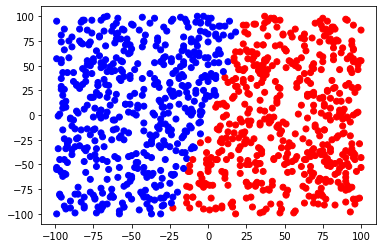

In [5]:
colors = ['r' if l else 'b' for l in target_labels]
plt.scatter(data[:,0], data[:,1], color=colors)

Finally let us now generate at random 100 linear models with coefficients in $[-5,5]$:

In [6]:
models = (np.random.rand(100,2) - 0.5) * 10
models

array([[-3.56708359,  4.2173679 ],
       [-2.24819841, -4.78033511],
       [-2.65217433, -0.6063707 ],
       [ 2.22522724, -1.3737868 ],
       [ 1.14192194, -2.89068754],
       [-2.57784496, -0.48320328],
       [-1.98567784, -4.32466545],
       [ 0.18087823,  3.4818154 ],
       [-1.29875835,  1.51557613],
       [ 4.81972953, -0.42049176],
       [ 0.50982555,  4.85988498],
       [-4.65192691,  4.7090496 ],
       [ 1.76978104, -1.68074194],
       [ 3.27116811, -2.24224267],
       [-4.23830139, -3.18612366],
       [-3.8511695 , -3.53659876],
       [ 4.17130749, -3.99493944],
       [-1.77612232, -2.98547622],
       [ 2.60284283, -3.54389893],
       [ 1.94474263,  0.87574031],
       [-0.77056305,  0.69232701],
       [ 3.34291539,  4.50561588],
       [-2.72563297,  3.53671823],
       [ 4.90984365,  1.68029481],
       [ 3.19955049,  3.70221394],
       [ 1.92131467,  3.118134  ],
       [-1.3720329 , -2.8185771 ],
       [-2.10756157, -3.29110329],
       [ 1.23355252,

# Exercise

1. Write a function that, taken two list of labellings build the corresponding confusion matrix [[1](#hint1)];
1. For each model in `models` plot the [FP,TP] pairs on a scatter plot;
1. Just looking at the plot: which is the best model in the pool?
1. Find the model with the best accuracy [[2](#hint2)] and compare it with the target model, is it close? Is it the model you would have picked up visually from the scatter plot?
1. If everything is ok, you should have found a pretty good model for our data. It fits the data quite well and it is quite close to the target model. Did you expect this? If so, why? If not so, why not?

<a name="hint1">Hint 1:</a> it may be helpful to have a way to map TRUE to 0, FALSE to 1 and to use these values as indices in the confusion matrix. 

<a name="hint2">Hint 2:</a> one way to proceed is to build a function `accuracy`, use the `map` function to calculate the accuracies of all the models, and then apply the `numpy.argmax` to retrieve the index of the best model.

# Es. 1

In [7]:
def build_confusion_matrix(labels1, labels2):
    confusion_matrix = np.zeros((2,2))
    for i in range(len(labels1)):
        confusion_matrix[1 - labels1[i], 1 - labels2[i]] += 1
    return confusion_matrix

In [8]:
print(build_confusion_matrix(apply_linear_model(target_model, data), apply_linear_model(models[0], data)))

[[124. 372.]
 [386. 118.]]


# Es. 2


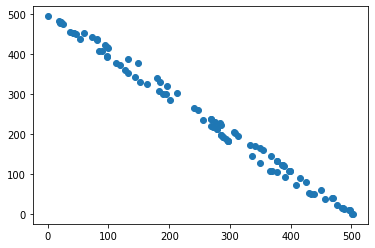

In [9]:
fp = []
tp = []

for model in models:
    confusion = build_confusion_matrix(target_labels, apply_linear_model(model, data))
    fp.append(confusion[1,0])
    tp.append(confusion[0,0])
plt.scatter(fp, tp)

# Es. 3

Il modello migliore è quello in alto a sinistra (max TP/FP)

In [10]:
models[np.argmax([t / f for t, f in zip(tp, fp)])]

array([ 3.40406949, -0.88692212])

# Es. 4


In [11]:
def accuracy(tp, tn, total):
    return (tp + tn) / total

In [12]:
accuracies = []

for model in models:
    confusion = build_confusion_matrix(target_labels, apply_linear_model(model, data))
    accuracies.append(accuracy(confusion[0,0], confusion[1,1], 1000))

print("model: ", models[np.argmax(accuracies)], " accuracy: ", accuracies[np.argmax(accuracies)])

model:  [ 3.40406949 -0.88692212]  accuracy:  0.998


Il modello è lo stesso predetto dalla plot

# Es. 5

Mi aspettavo di trovare un modello con un'accuracy alta ma non come quella trovata (0.995), perchè su 100 modelli, con due variabili comprese tra 5 e -5, generati con una funzione random uniforme mi aspetto dei valori vicini a quelli target.